In [108]:
import numpy as np
import pickle
from pathlib import Path
from scipy.spatial.distance import pdist
from itertools import combinations,chain
import pandas as pd

In [4]:
calval_dir = Path.cwd()/'calval'
calval_location = 'central_valley_multi'
work_dir = calval_dir/calval_location

In [15]:
with open(work_dir/'approach2.pkl','rb') as f:
    X, Y, data, ifgs_date = pickle.load(f)

In [14]:
n_ifgs = len(X)

In [63]:
dist = [] # distance
rel_measure = [] # relative measurement
for i in range(n_ifgs):
    x = X[i]
    y = Y[i]
    data_i = data[i]
    xy = np.stack((x,y),axis=-1)
    distance = pdist(xy)
    index_iter = chain.from_iterable(combinations(range(len(x)),2))
    index = np.fromiter(index_iter,int).reshape(-1,2)
    rel_measure_i = data_i[index[:,0]] - data_i[index[:,1]]
    
    dist.append(distance)
    rel_measure.append(rel_measure_i)

In [75]:
n_bins = 10
bins = np.linspace(0.0,50.0,num=n_bins+1)

In [79]:
n_all = np.empty([n_ifgs,n_bins+1],dtype=int) # number of points for each ifgs and bins
n_pass = np.empty([n_ifgs,n_bins+1],dtype=int) # number of points pass
#ratio = np.empty([n_ifgs,n_bins+1]) # ratio
# the final column is the ratio as a whole
for i in range(n_ifgs):
    inds = np.digitize(dist[i],bins)
    for j in range(1,n_bins+1):
        rqmt = 3*(1+np.sqrt(dist[i][inds==j]))# mission requirement for i-th ifgs and j-th bins
        rem = rel_measure[i][inds==j] # relative measurement
        assert len(rqmt) == len(rem)
        n_all[i,j-1] = len(rem)
        n_pass[i,j-1] = np.count_nonzero(rem<rqmt)
    n_all[i,-1] = np.sum(n_all[i,0:-2])
    n_pass[i,-1] = np.sum(n_pass[i,0:-2])

In [134]:
def to_str(x:bool):
    if x==True:
        return 'true '
    elif x==False:
        return 'false '

In [135]:
ratio = n_pass/n_all
success_or_fail = ratio>0.95
success_or_fail_str = [list(map(to_str, x)) for x in success_or_fail]

In [90]:
columns = []
for i in range(n_bins):
    columns.append(str(int(bins[i]))+'-'+str(int(bins[i+1])))
columns.append('total')

In [94]:
index = []
for i in range(len(ifgs_date)):
    index.append(ifgs_date[i,0].strftime('%Y%m%d')+'-'+ifgs_date[i,1].strftime('%Y%m%d'))

In [137]:
n_all_pd = pd.DataFrame(n_all,columns=columns,index=index)
n_pass_pd = pd.DataFrame(n_pass,columns=columns,index=index)
ratio_pd = pd.DataFrame(ratio,columns=columns,index=index)
success_or_fail_pd = pd.DataFrame(success_or_fail_str,columns=columns,index=index)

Number of data points in each bin:

In [101]:
n_all_pd

0-5  5-10  10-15  15-20  20-25  25-30  30-35  35-40  \
20180103-20180115  1616  4618   7342   9759  12183  14192  16013  17324   
20180115-20180127  1637  4553   7248   9686  11636  13460  15058  16696   
20180127-20180208  1532  4417   6970   9361  11417  13389  14904  16260   
20180208-20180220  1656  4452   7265   9446  11636  13256  14969  16195   
20180220-20180304  1830  5392   8269  10916  13476  15353  16991  18339   
20180304-20180316  1899  5339   8112  10828  12705  14837  16421  17923   
20180316-20180328  1874  5031   8148  10579  12919  14803  16515  17913   
20180328-20180409  1666  4728   7328   9657  11743  13808  15463  16900   
20180409-20180421  1582  4442   6970   9502  11143  13043  14774  15950   
20180421-20180503  1609  4441   7040   9386  11674  13098  14605  16004   
20180503-20180515  1560  4632   7132   9466  11475  13246  14763  16095   
20180515-20180527  1579  4484   7198   9556  11347  13398  14468  15913   
20180527-20180608  1618  4571   7090   9343  11256  13029  14809  15958   
20180608-20180620  1603  4477   6956   9155  11257  12845  14189  15766   
20180620-20180702  1574  4453   7150   9198  11456  13254  14540  16077   
20180702-20180714  1634  4634   7182   9505  11584  13320  14826  16023   

                   40-45  45-50   total  
20180103-20180115  18473  19372  101520  
20180115-20180127  17827  18498   97801  
20180127-20180208  17694  18576   95944  
20180208-20180220  17628  18693   96503  
20180220-20180304  19377  20186  109943  
20180304-20180316  19247  20234  107311  
20180316-20180328  19278  20546  107060  
20180328-20180409  18250  19144   99543  
20180409-20180421  17028  18310   94434  
20180421-20180503  17035  18208   94892  
20180503-20180515  17113  18101   95482  
20180515-20180527  17122  17987   95065  
20180527-20180608  17214  18039   94888  
20180608-20180620  16798  17427   93046  
20180620-20180702  17159  17687   94861  
20180702-20180714  17190  18462   95898

Number of data points that below the curve:

In [102]:
n_pass_pd

0-5  5-10  10-15  15-20  20-25  25-30  30-35  35-40  \
20180103-20180115  1605  4558   7241   9607  12003  13951  15765  17027   
20180115-20180127  1598  4367   6956   9330  11228  12919  14440  16013   
20180127-20180208  1524  4359   6840   9197  11228  13208  14729  16116   
20180208-20180220  1651  4424   7209   9402  11578  13201  14937  16166   
20180220-20180304  1820  5346   8217  10838  13383  15256  16861  18150   
20180304-20180316  1850  5242   8017  10741  12580  14717  16328  17854   
20180316-20180328  1861  4956   8035  10423  12758  14570  16184  17584   
20180328-20180409  1641  4643   7151   9265  11096  13000  14497  15778   
20180409-20180421  1565  4358   6710   9060  10551  12309  13959  14960   
20180421-20180503  1585  4363   6868   9020  11081  12238  13456  14543   
20180503-20180515  1548  4587   7070   9379  11400  13174  14688  16057   
20180515-20180527  1569  4458   7148   9463  11229  13260  14300  15732   
20180527-20180608  1583  4367   6673   8621  10301  11992  13556  14517   
20180608-20180620  1574  4319   6624   8620  10567  11970  13182  14631   
20180620-20180702  1547  4344   6867   8812  10891  12571  13728  15343   
20180702-20180714  1565  4358   6682   8840  10814  12448  13982  15104   

                   40-45  45-50   total  
20180103-20180115  18201  19107   99958  
20180115-20180127  17079  17760   93930  
20180127-20180208  17568  18477   94769  
20180208-20180220  17603  18684   96171  
20180220-20180304  19150  19921  109021  
20180304-20180316  19192  20185  106521  
20180316-20180328  18916  20142  105287  
20180328-20180409  16988  17767   94059  
20180409-20180421  16003  17152   89475  
20180421-20180503  15150  15927   88304  
20180503-20180515  17063  18047   94966  
20180515-20180527  16942  17864   94101  
20180527-20180608  15630  16309   87240  
20180608-20180620  15464  16144   86951  
20180620-20180702  16524  17201   90627  
20180702-20180714  16157  17496   89950

Ratio of pass:

In [142]:
s = ratio_pd.style
s.set_table_styles([  # create internal CSS classes
    {'selector': '.true', 'props': 'background-color: #e6ffe6;'},
    {'selector': '.false', 'props': 'background-color: #ffe6e6;'},
], overwrite=False)
s.set_td_classes(success_or_fail_pd)

Number of interferograms pass the requirement:

In [107]:
np.count_nonzero(ratio_pd['total']>0.95)/n_ifgs

0.625

We have got aggrement that the requirement is at least 70% of interferograms need to be "qualified". Our requirement for each interferogram is "the accuracy specification is $3(1+ L^{\frac{1}{2}})$ mm over 0.1 km < L < 50 km". But the quantitative method to test if one interferogram succeed or fail have not been determined.

We pre-process data in such way:
1. Use deramped interferograms to derive InSAR measurements. 
2. Randomly select pixels.
3. Pair up all selected pixels and calcute the distance and relative measurements for each pair.
4. Remove pairs with distance large than half of interferograms' width (isotropy).
Now, we have a collection of (distance, relative InSAR measurement) data points.

We have four criteria candidates that have different processing strategies:

1. Count the ratio between number of data points under the requirement curve and number of all data points, if the ratio is larger than 95%, we say this interferogram succeed;

2. After deriving the displacements, calculate the emperical variances by
$$ S =\frac{1}{2}(d)^{2} $$
where $d$ is the relative displacement.
Then bin the emperical variances to calcute square root of the mean emperical variances and their standard deviation for each bin. if
$$ \sqrt{emperical \: variance} + std < requirement \: curve$$
for all bins, we say this ingergerogram succeed;

3. Model the relative displacements as
$$d(x) \sim N(0,\sigma(x)),$$
where $x$ is the distance. Bin the data points. In each bin, all data points are treated as sample of normal distribution $N(0, \sigma^2(x_i))$ where $x_i$ is the central distance of the i-th bin. So, statistically, we intepret the requirement as: For each bin, 
$$\sigma(x_i) < 3(1+x_i^{\frac{1}{2}})$$ with a confidence probability larger than 95%.
Now, the question has converted to a statistical hypothetical test problem.

4. Model the relative displacements as
$$d(x) \sim N(0,\sigma(x)),$$
where $x$ is the distance.
Notice that our requirement curve is $3(1+ x^{\frac{1}{2}})$, this curve imply that we have prior-knowledge about $\sigma(x)$:
$$\sigma(x) \sim 1+ x^{\frac{1}{2}}.$$
Let $f(x) = 1+x^{\frac{1}{2}}$, all data points are treated as sample of normal distribution $N(0, af(x))$. Statistically, we intepret the requirement as: $$a < 3$$ with a confidence probability larger than 95%. Now, the question also has converted to a statistical hypothetical test problem.

### 4.3.D Compute Emprical Variance

The empircal variance is defined as:
$$ S_{i,j}=\frac{1}{2}(S(i)-S(j))^{2} $$
Where $S$ is the displacement and $i,j$ are index.

Pairs with distance larger than half of the frame are removed.

In [121]:
dist = []
vario = []
for i in range(n_ifgs):
    dist_i,vario_i = compute_empircal_variance(data[i],X[i],Y[i])
    dist.append(dist_i)
    vario.append(vario_i)

Pair larger than  50.0 km removed!
Number of pairs reduced to:  134216
Pair larger than  50.0 km removed!
Number of pairs reduced to:  135167
Pair larger than  50.0 km removed!
Number of pairs reduced to:  135496
Pair larger than  50.0 km removed!
Number of pairs reduced to:  136971
Pair larger than  50.0 km removed!
Number of pairs reduced to:  136253
Pair larger than  50.0 km removed!
Number of pairs reduced to:  134324
Pair larger than  50.0 km removed!
Number of pairs reduced to:  133707
Pair larger than  50.0 km removed!
Number of pairs reduced to:  136242
Pair larger than  50.0 km removed!
Number of pairs reduced to:  137845
Pair larger than  50.0 km removed!
Number of pairs reduced to:  136071
Pair larger than  50.0 km removed!
Number of pairs reduced to:  134506
Pair larger than  50.0 km removed!
Number of pairs reduced to:  134457
Pair larger than  50.0 km removed!
Number of pairs reduced to:  137753
Pair larger than  50.0 km removed!
Number of pairs reduced to:  137397
Pair l

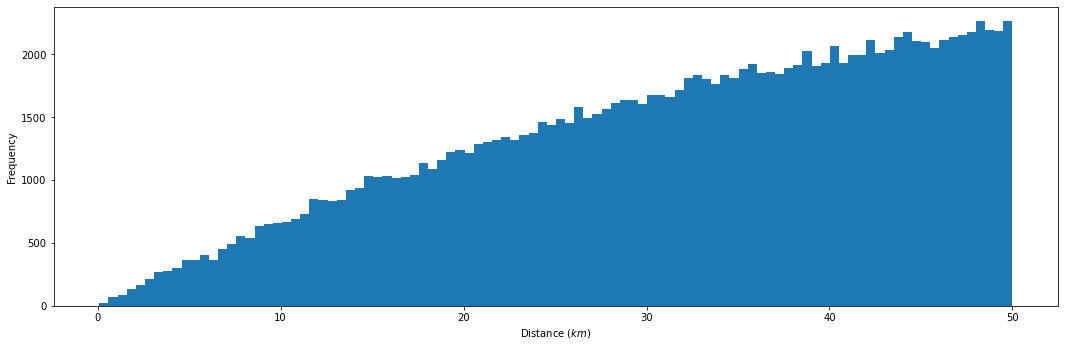

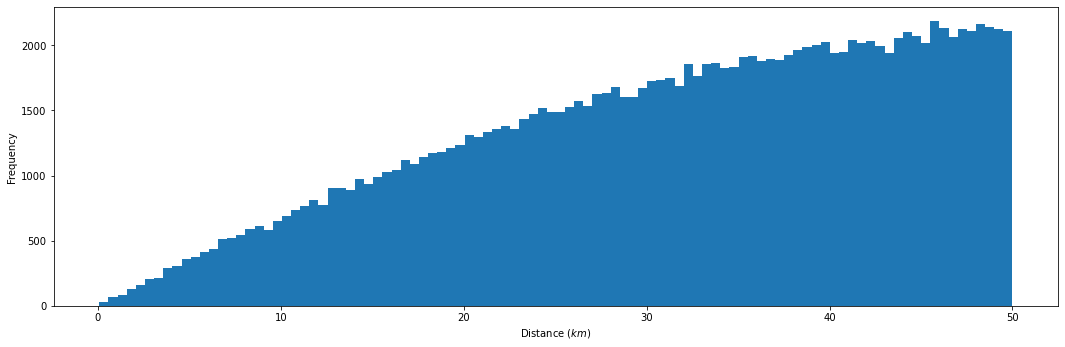

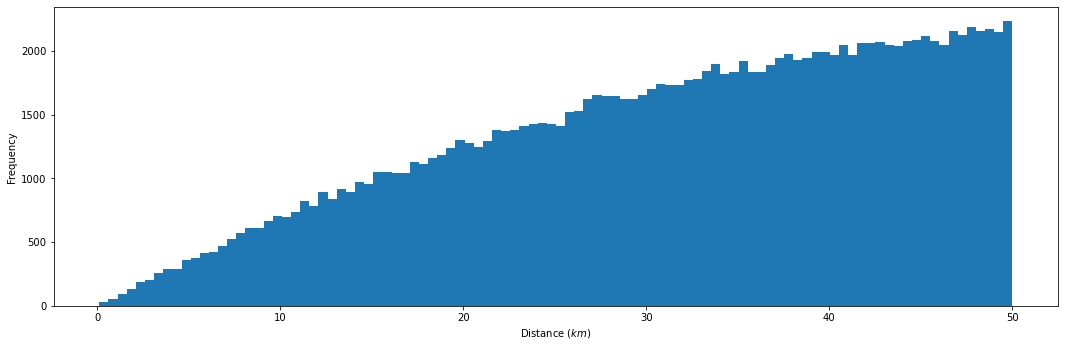

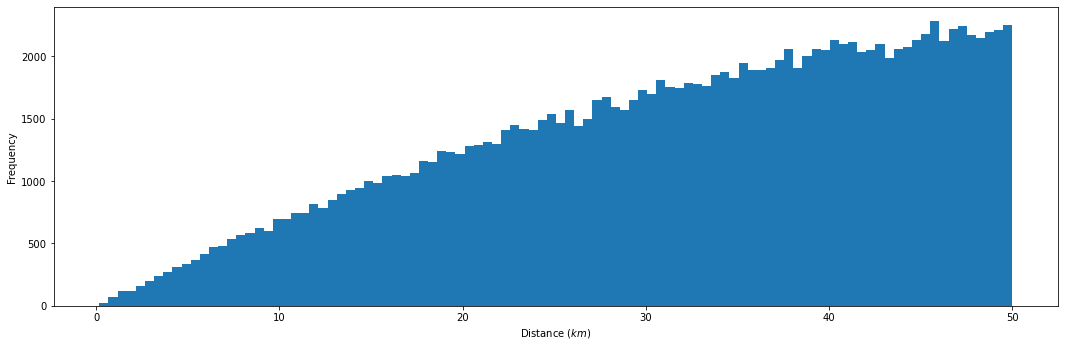

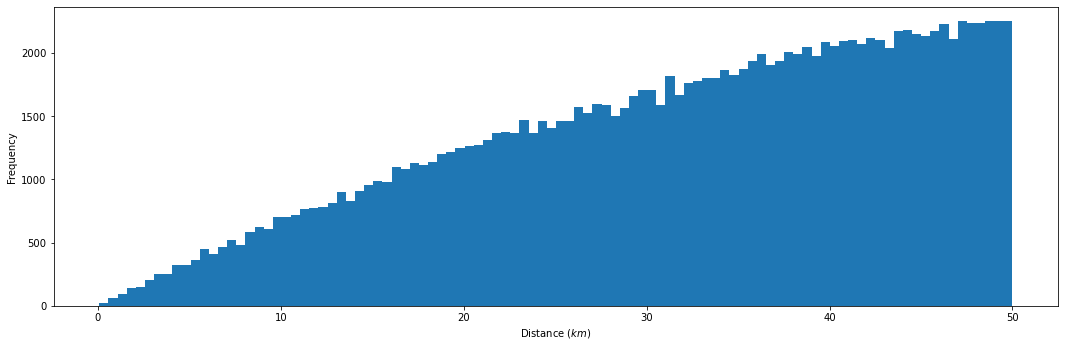

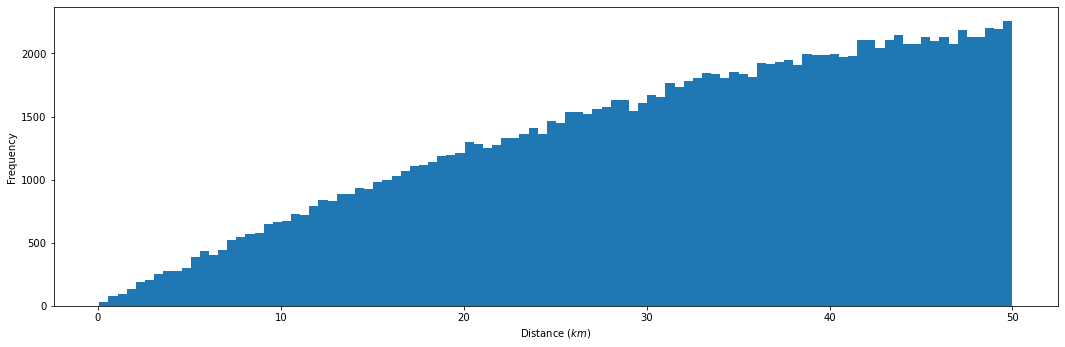

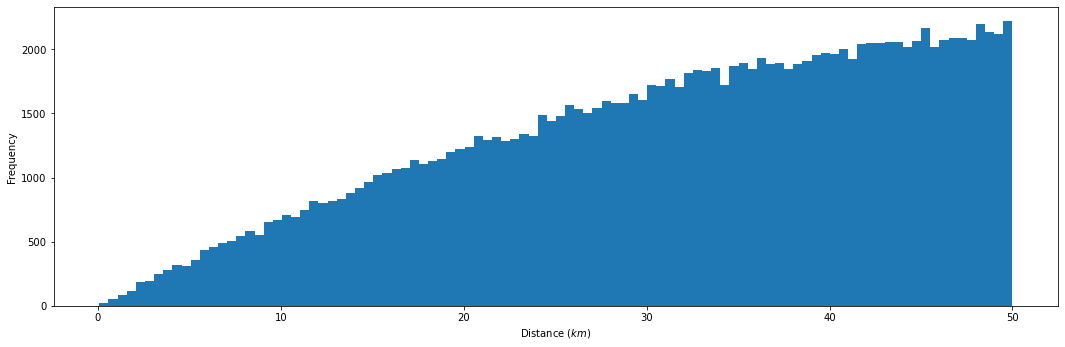

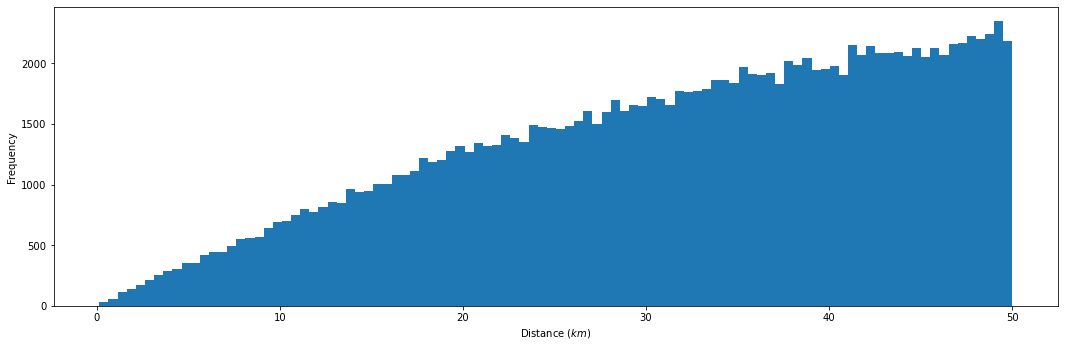

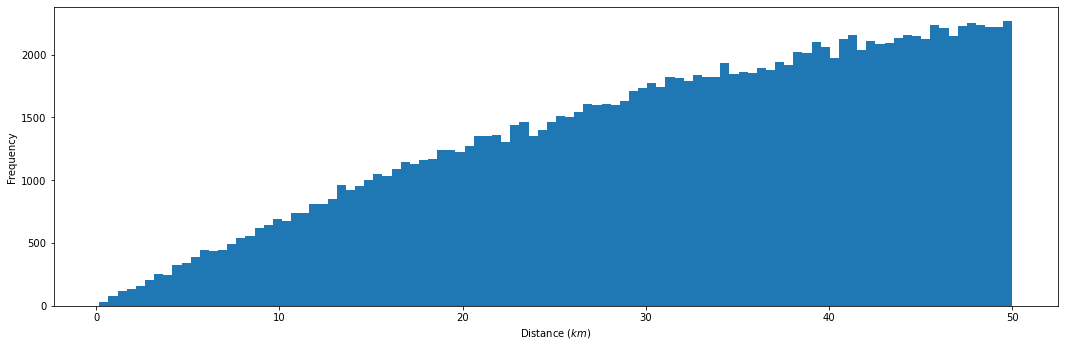

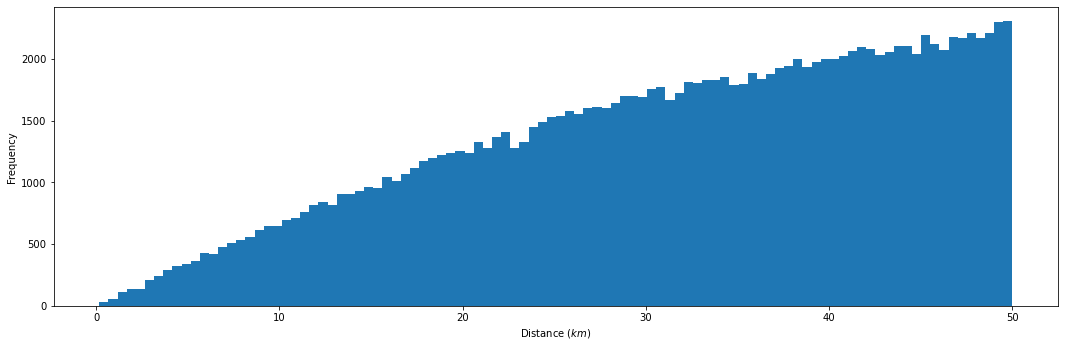

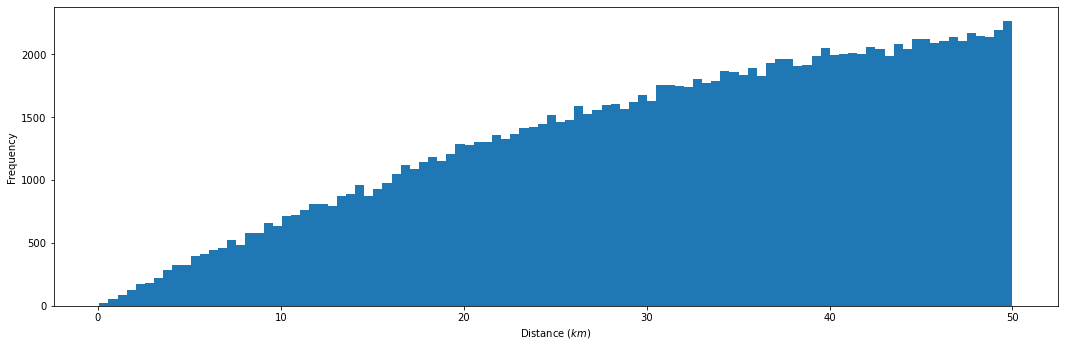

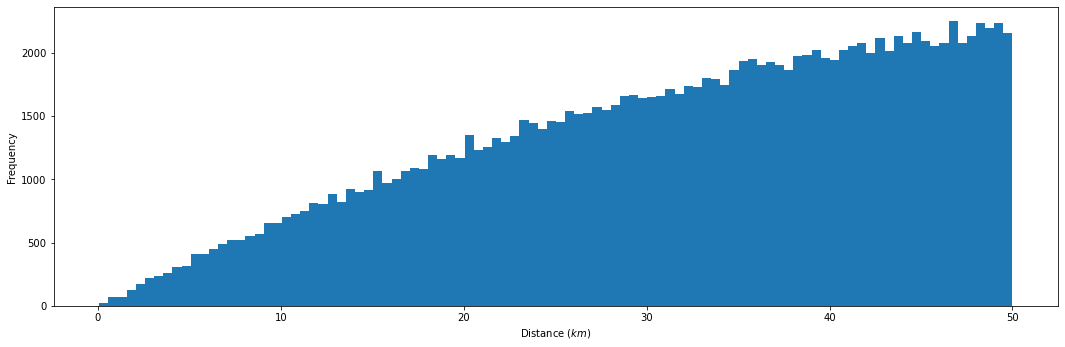

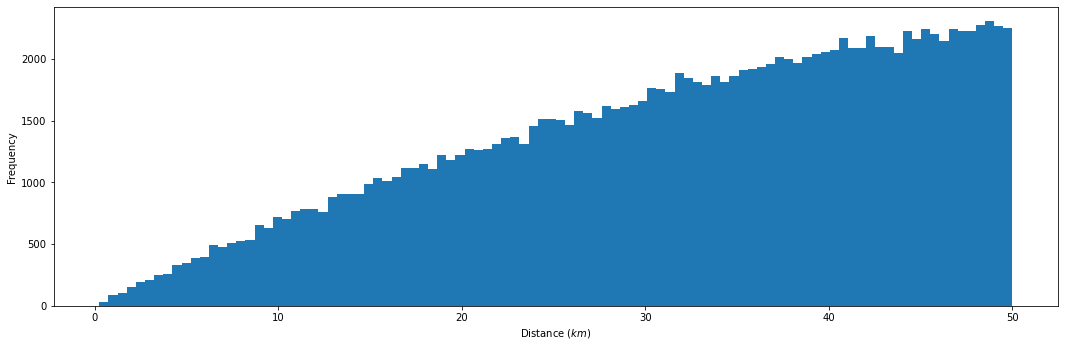

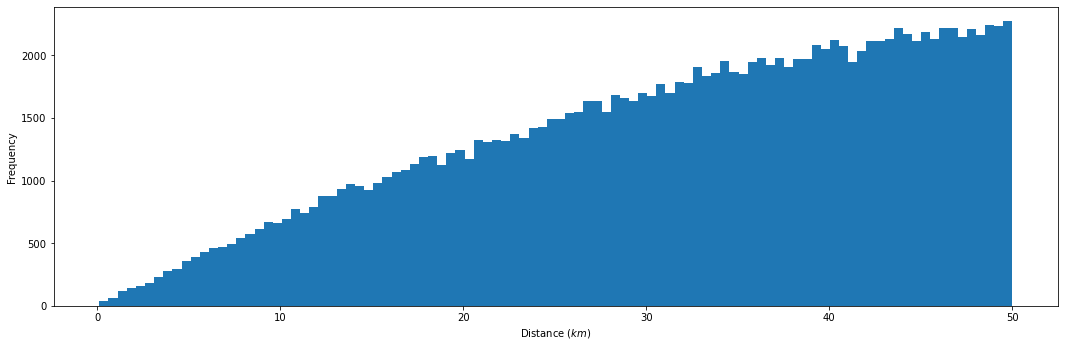

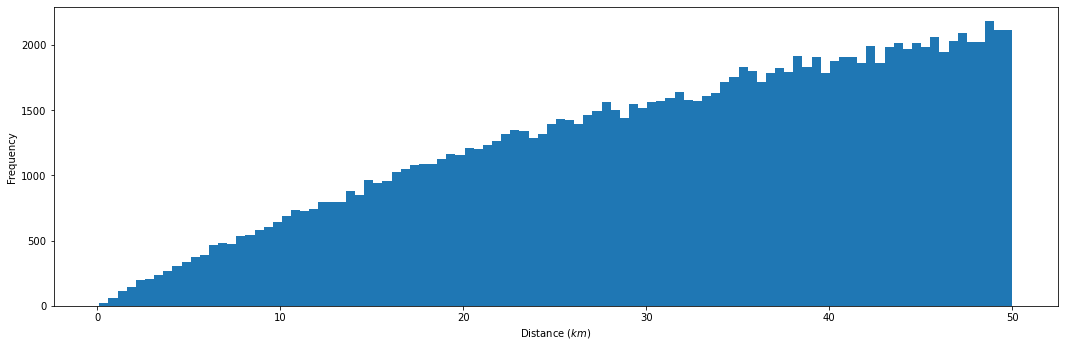

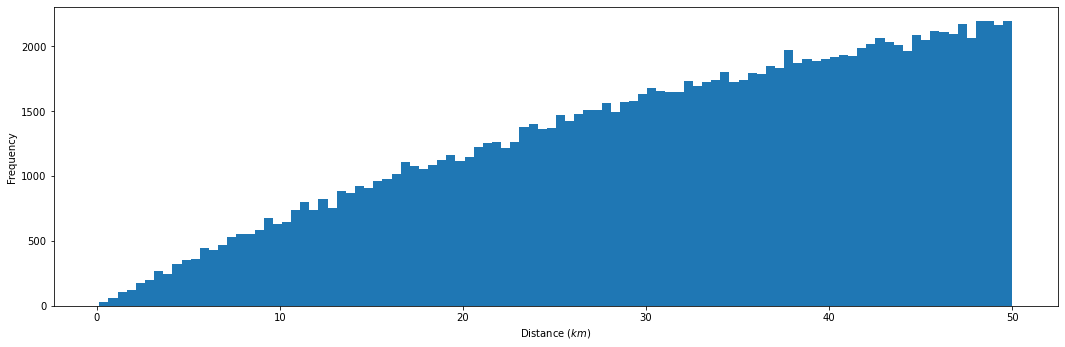

In [122]:
for i in range(n_ifgs):
    fig, ax = plt.subplots(figsize=[18, 5.5])

    img1 = ax.hist(dist[i], bins=100)
    ax.set_xlabel(r'Distance ($km$)')
    ax.set_ylabel('Frequency')

**NOTE**: the distribution of distance is even! We need to make sure if the sampling method is reasonable.

/users/kangl/miniconda3/envs/ARIA-tools/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/users/kangl/miniconda3/envs/ARIA-tools/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

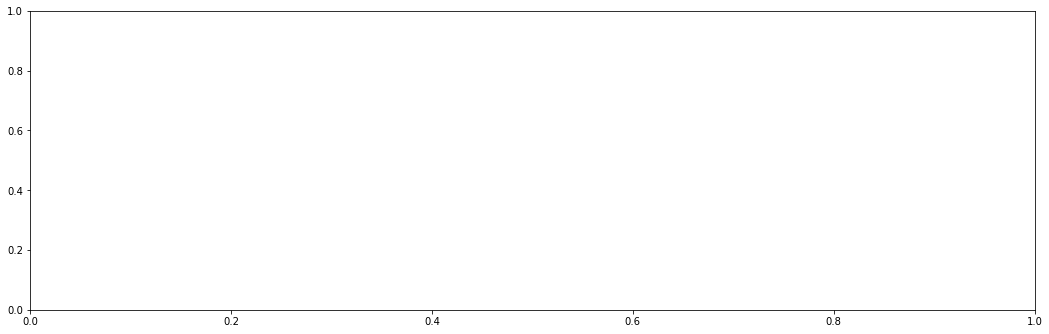

In [123]:
for i in range(n_ifgs):
    fig, ax = plt.subplots(figsize=[18, 5.5])

    img1 = ax.hist(vario[i], bins=100)
    ax.set_xlabel(r'Variogram ($mm^2$)')
    ax.set_ylabel('Frequency')

In [ ]:
for i in range(n_ifgs):
    fig, ax = plt.subplots(figsize=[18, 5.5])
    ax.scatter(dist[i], vario[i], s=1, alpha=0.25)
    ax.set_ylabel(r'Variogram ($mm^2$)')
    ax.set_xlabel('Distance (km)')

### 4.3.E Make Binned Variogram

In [ ]:
dist_binned = []
variogram_binned = []
std_binned = []
for i in range(n_ifgs):
    dist_binned_i, variogram_binned_i, std_binned_i = bin_variogram(dist[i], vario[i],
                                                             distance_range=[0, 50],
                                                             bins=20
                                                             )
    dist_binned.append(dist_binned_i)
    variogram_binned.append(variogram_binned_i)
    std_binned.append(std_binned_i)

### 4.3.F Compare Variation with Requirement

In [ ]:
for i in range(n_ifgs):
    fig, ax = plt.subplots(figsize=[18, 5.5])
    ax.plot(dist_binned[i], 3*(1+np.sqrt(dist_binned[i])), 'r')

    ax.errorbar(dist_binned[i], np.sqrt(variogram_binned[i]),yerr=std_binned[i],fmt='bo',capsize=10)

    ax.set_xlabel('Distance (km)')
    ax.set_ylabel('Uncertainty (mm)')

    plt.legend(["Mission Requirement","Measuement"])

**Note:** Here we use the square root of binned emperical variogram as the emperical uncertaity.